In [756]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, cohen_kappa_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score

In [757]:
import pandas as pd

data= pd.read_csv('online_shoppers_intention.csv')

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [758]:
data_cat=data[['Month','Region','Browser','OperatingSystems','Weekend','Revenue','TrafficType','VisitorType','SpecialDay']]
data_num=data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']]

In [759]:
data_cat

,Month,Region,Browser,OperatingSystems,Weekend,Revenue,TrafficType,VisitorType,SpecialDay
0,Feb,1,1,1,False,False,1,Returning_Visitor,0.0
1,Feb,1,2,2,False,False,2,Returning_Visitor,0.0
2,Feb,9,1,4,False,False,3,Returning_Visitor,0.0
3,Feb,2,2,3,False,False,4,Returning_Visitor,0.0
4,Feb,1,3,3,True,False,4,Returning_Visitor,0.0
...,...,...,...,...,...,...,...,...,...
12325,Dec,1,6,4,True,False,1,Returning_Visitor,0.0
12326,Nov,1,2,3,True,False,8,Returning_Visitor,0.0
12327,Nov,1,2,3,True,False,13,Returning_Visitor,0.0
12328,Nov,3,2,2,False,False,11,Returning_Visitor,0.0


### Label Encoding of Ordinal Categorical Columns

In [760]:
from sklearn import preprocessing

In [761]:
le=preprocessing.LabelEncoder()

In [762]:
data_cat_le=data_cat[['SpecialDay']].apply(le.fit_transform)

In [763]:
data_cat_le['SpecialDay'].value_counts()

0    11079
3      351
4      325
2      243
1      178
5      154
Name: SpecialDay, dtype: int64

### Encoding of Nominal Categorical Columns

In [764]:
data_cat = data_cat.drop(['SpecialDay'],  axis=1)

In [765]:
data_cat_dum = pd.get_dummies(data_cat, drop_first=True)

In [766]:
data_cat_dum.columns

Index(['Region', 'Browser', 'OperatingSystems', 'Weekend', 'Revenue',
       'TrafficType', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [767]:
data_cat_dum.dtypes

Region                           int64
Browser                          int64
OperatingSystems                 int64
Weekend                           bool
Revenue                           bool
TrafficType                      int64
Month_Dec                        uint8
Month_Feb                        uint8
Month_Jul                        uint8
Month_June                       uint8
Month_Mar                        uint8
Month_May                        uint8
Month_Nov                        uint8
Month_Oct                        uint8
Month_Sep                        uint8
VisitorType_Other                uint8
VisitorType_Returning_Visitor    uint8
dtype: object

In [768]:
data_cat_dum['Weekend'].replace (False,0, inplace = True)

In [769]:
data_cat_dum['Weekend'].value_counts()

0.0    9462
1.0    2868
Name: Weekend, dtype: int64

In [770]:
data_cat_dum['Weekend'] =data_cat_dum['Weekend'].astype('int')

In [771]:
data_cat_dum['Revenue'].replace (False, 0, inplace=True)

In [772]:
data_cat_dum['Revenue'].value_counts()

0.0    10422
1.0     1908
Name: Revenue, dtype: int64

In [773]:
data_cat_dum['Revenue']= data_cat_dum['Revenue'].astype('int')

In [774]:
data_cat_dum.dtypes

Region                           int64
Browser                          int64
OperatingSystems                 int64
Weekend                          int32
Revenue                          int32
TrafficType                      int64
Month_Dec                        uint8
Month_Feb                        uint8
Month_Jul                        uint8
Month_June                       uint8
Month_Mar                        uint8
Month_May                        uint8
Month_Nov                        uint8
Month_Oct                        uint8
Month_Sep                        uint8
VisitorType_Other                uint8
VisitorType_Returning_Visitor    uint8
dtype: object

In [775]:
data_cat_dum

,Region,Browser,OperatingSystems,Weekend,Revenue,TrafficType,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,1,2,2,0,0,2,0,1,0,0,0,0,0,0,0,0,1
2,9,1,4,0,0,3,0,1,0,0,0,0,0,0,0,0,1
3,2,2,3,0,0,4,0,1,0,0,0,0,0,0,0,0,1
4,1,3,3,1,0,4,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1,6,4,1,0,1,1,0,0,0,0,0,0,0,0,0,1
12326,1,2,3,1,0,8,0,0,0,0,0,0,1,0,0,0,1
12327,1,2,3,1,0,13,0,0,0,0,0,0,1,0,0,0,1
12328,3,2,2,0,0,11,0,0,0,0,0,0,1,0,0,0,1


In [776]:
data_cat_le.head()

,SpecialDay
0,0
1,0
2,0
3,0
4,0


### Transforming Numerical Features

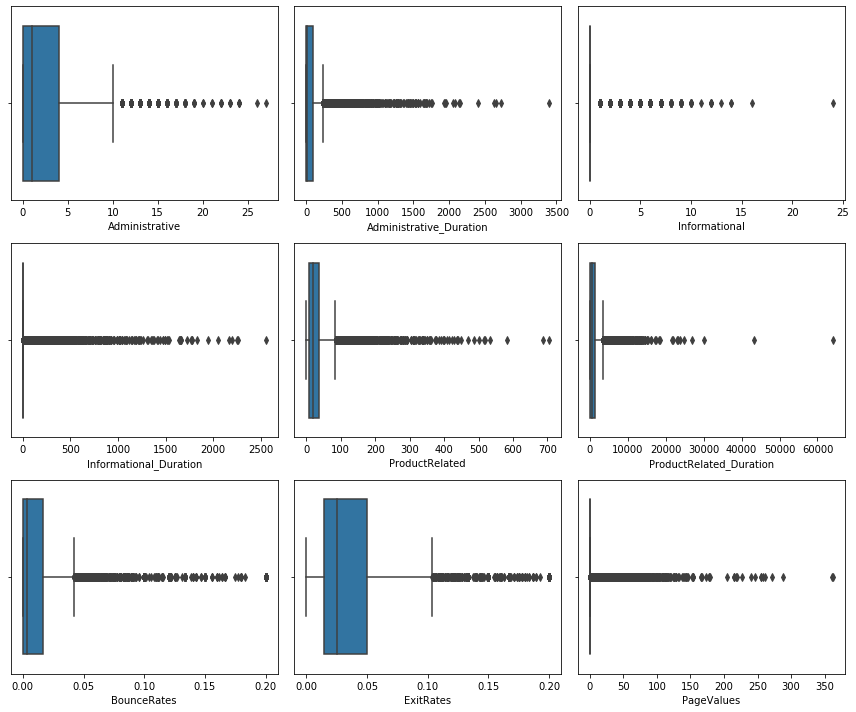

In [777]:
num_cols = data_num.columns
fig, ax = plt.subplots(3,3,figsize=(12,10))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data_num[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

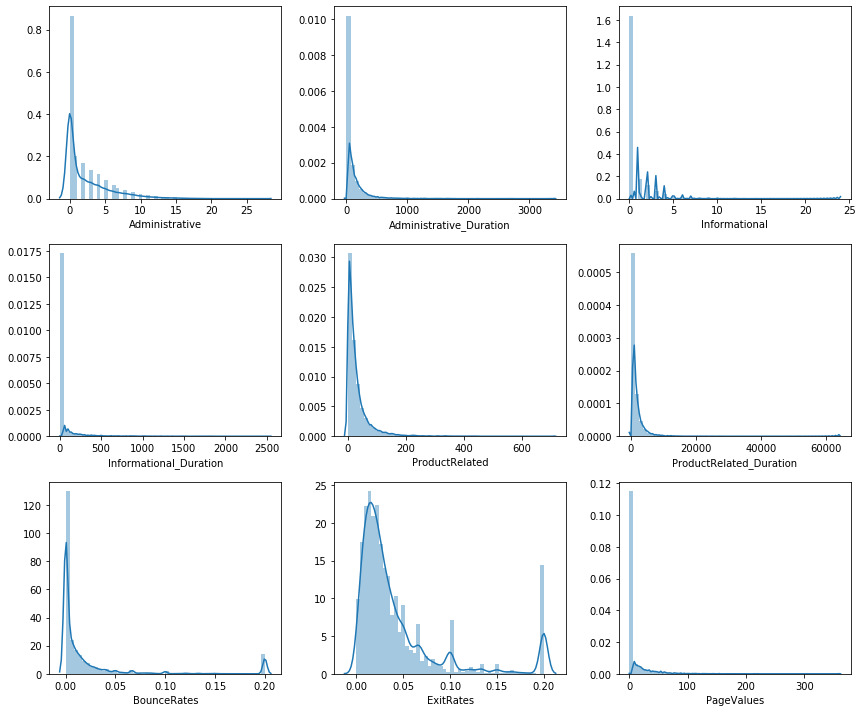

In [778]:
num_cols = data_num.columns
fig, ax = plt.subplots(3,3,figsize=(12,10))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.distplot(data_num[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

Administrative

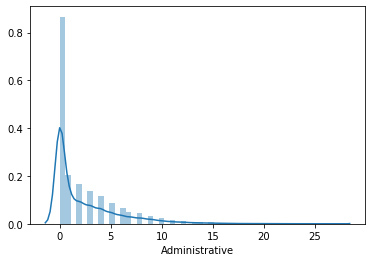

In [779]:
sns.distplot(data_num['Administrative'])

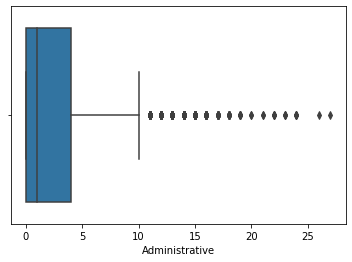

In [780]:
sns.boxplot(data_num['Administrative'])

In [781]:
data_num['Administrative']=np.sqrt(np.sqrt(data_num['Administrative']))

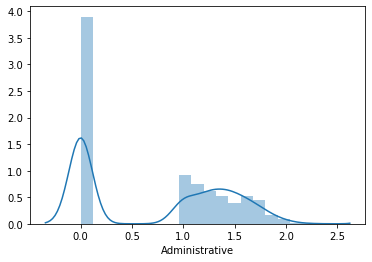

In [782]:
sns.distplot(data_num['Administrative'])

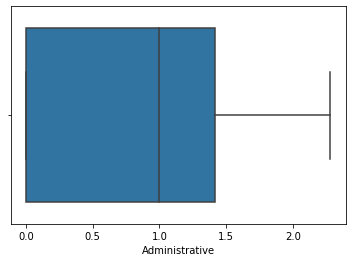

In [783]:
sns.boxplot(data_num['Administrative'])

Administrative Duration

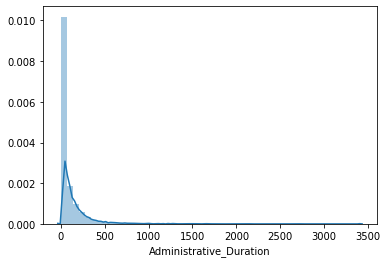

In [784]:
sns.distplot(data_num['Administrative_Duration'])

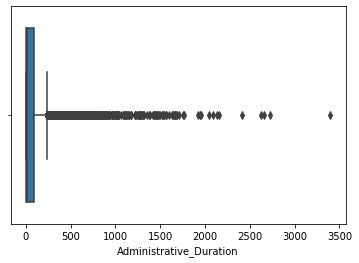

In [785]:
sns.boxplot(data_num['Administrative_Duration'])

In [786]:
data_num['Administrative_Duration'] = np.log1p(np.sqrt(data_num['Administrative_Duration']))

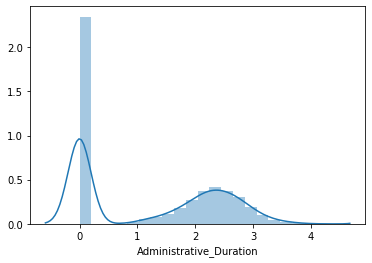

In [787]:
sns.distplot(data_num['Administrative_Duration'])

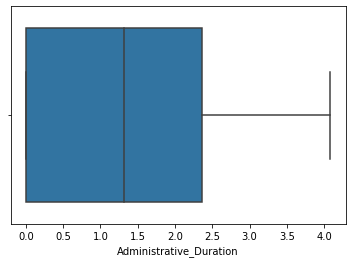

In [788]:
sns.boxplot(data_num['Administrative_Duration'])

In [789]:
data_num.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
dtype: int64

Informational

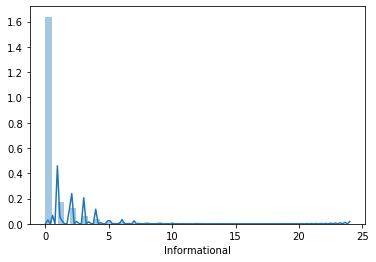

In [790]:
sns.distplot(data_num['Informational'])

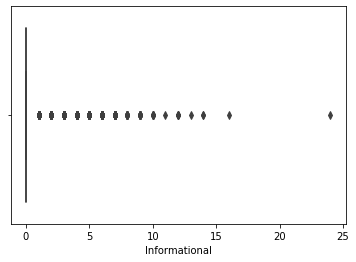

In [791]:
sns.boxplot(data_num['Informational'])

In [792]:
data_num['Informational'] = np.sqrt(np.sqrt(np.sqrt(data_num['Informational'])))

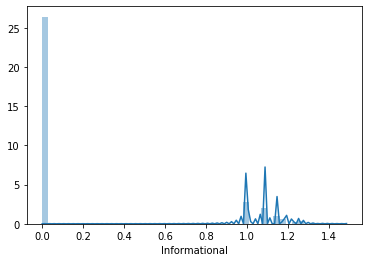

In [793]:
sns.distplot(data_num['Informational'])

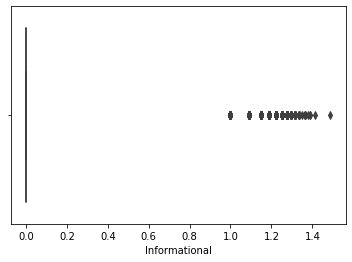

In [794]:
sns.boxplot(data_num['Informational'])

Informational Duration

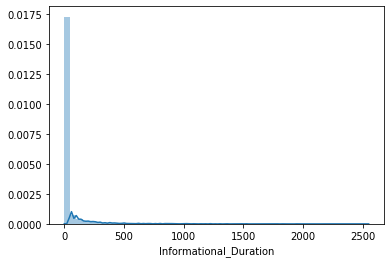

In [795]:
sns.distplot(data_num['Informational_Duration'])

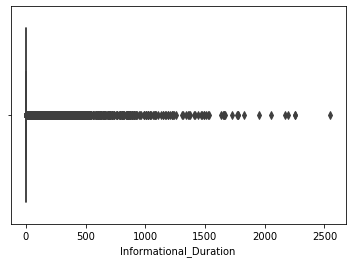

In [796]:
sns.boxplot(data_num['Informational_Duration'])

In [797]:
data_num['Informational_Duration'] = np.sqrt(np.sqrt(data_num['Informational_Duration']))

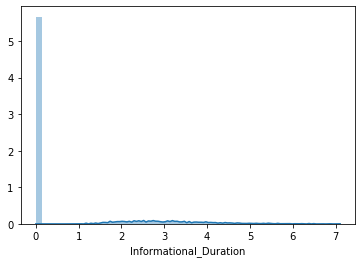

In [798]:
sns.distplot(data_num['Informational_Duration'])

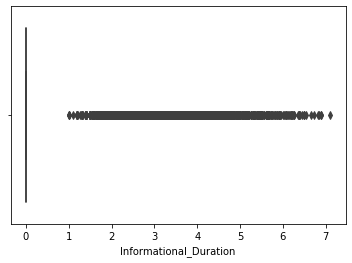

In [799]:
sns.boxplot(data_num['Informational_Duration'])

Product Related


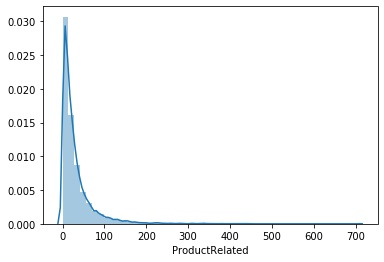

In [800]:
sns.distplot(data_num['ProductRelated'])

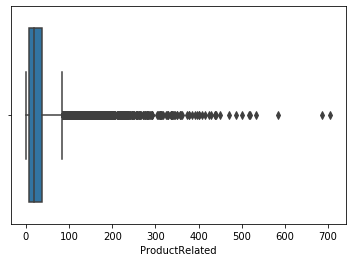

In [801]:
sns.boxplot(data_num['ProductRelated'])

In [802]:
data_num['ProductRelated']=np.sqrt(np.sqrt(data_num['ProductRelated']))

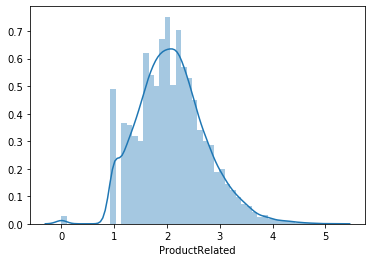

In [803]:
sns.distplot(data_num['ProductRelated'])

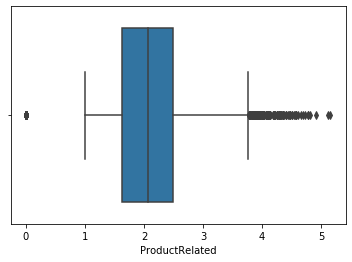

In [804]:
sns.boxplot(data_num['ProductRelated'])

Product Related Duration

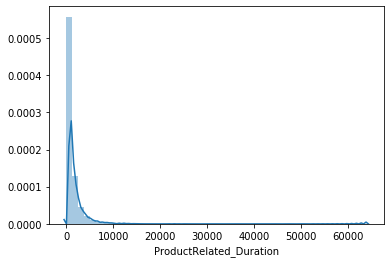

In [805]:
sns.distplot(data_num['ProductRelated_Duration'])

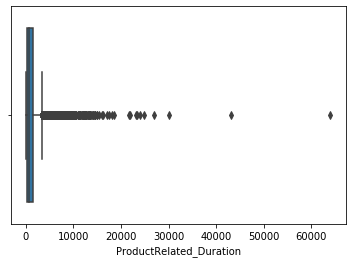

In [806]:
sns.boxplot(data_num['ProductRelated_Duration'])

In [807]:
data_num['ProductRelated_Duration']=np.sqrt(np.sqrt(np.sqrt(data_num['ProductRelated_Duration'])))

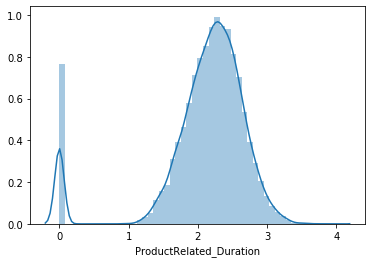

In [808]:
sns.distplot(data_num['ProductRelated_Duration'])

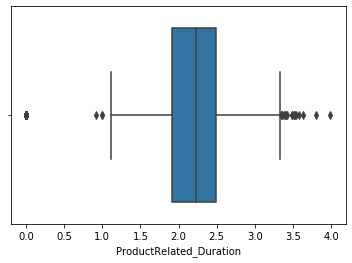

In [809]:
sns.boxplot(data_num['ProductRelated_Duration'])

Bounce Rates

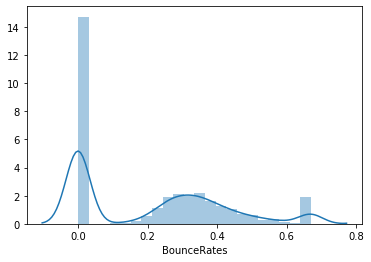

In [810]:
sns.distplot(np.sqrt(np.sqrt(data_num['BounceRates'])))

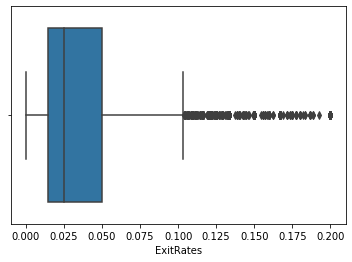

In [811]:
sns.boxplot(data_num['ExitRates'])

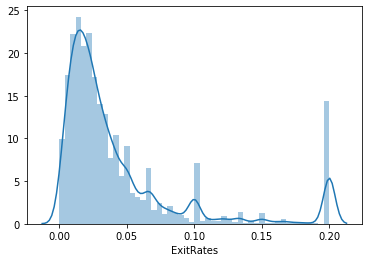

In [812]:
sns.distplot(data_num['ExitRates'])

In [813]:
data_num['ExitRates']= np.sqrt(np.sqrt(data_num['ExitRates']))

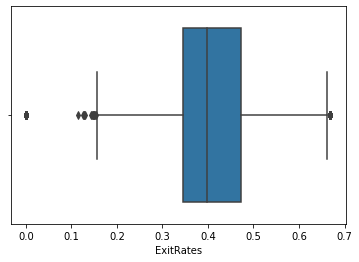

In [814]:
sns.boxplot(data_num['ExitRates'])

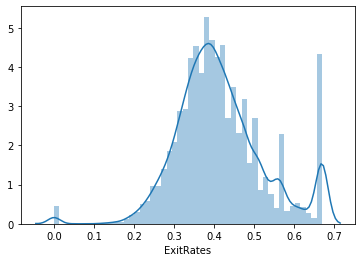

In [815]:
sns.distplot(data_num['ExitRates'])

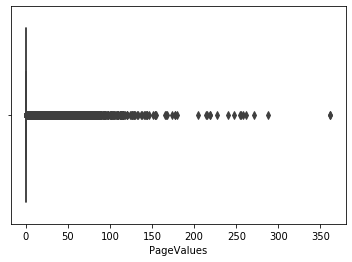

In [816]:
sns.boxplot(data_num['PageValues'])

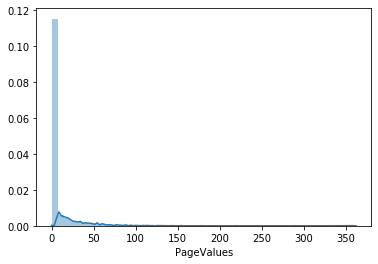

In [817]:
sns.distplot(data_num['PageValues'])

In [818]:
data_num['PageValues'] = np.sqrt(np.sqrt(np.sqrt(data_num['PageValues'])))

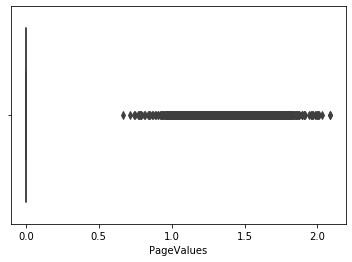

In [819]:
sns.boxplot(data_num['PageValues'])

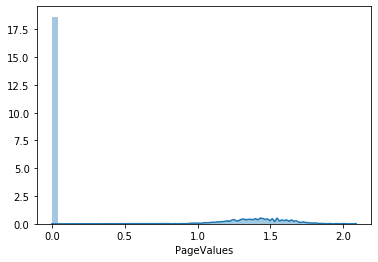

In [820]:
sns.distplot(data_num['PageValues'])

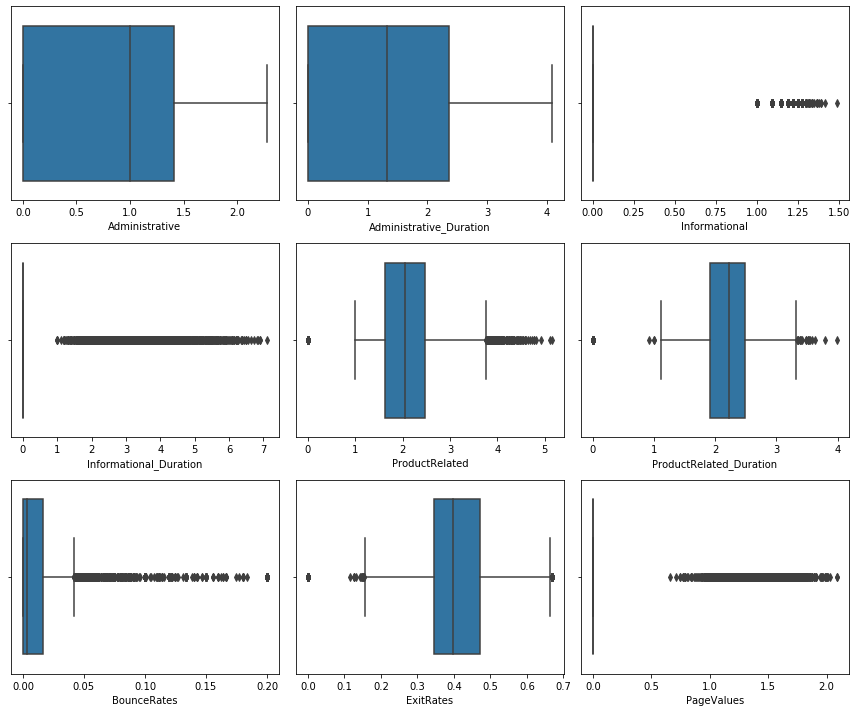

In [821]:
num_cols = data_num.columns
fig, ax = plt.subplots(3,3,figsize=(12,10))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data_num[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

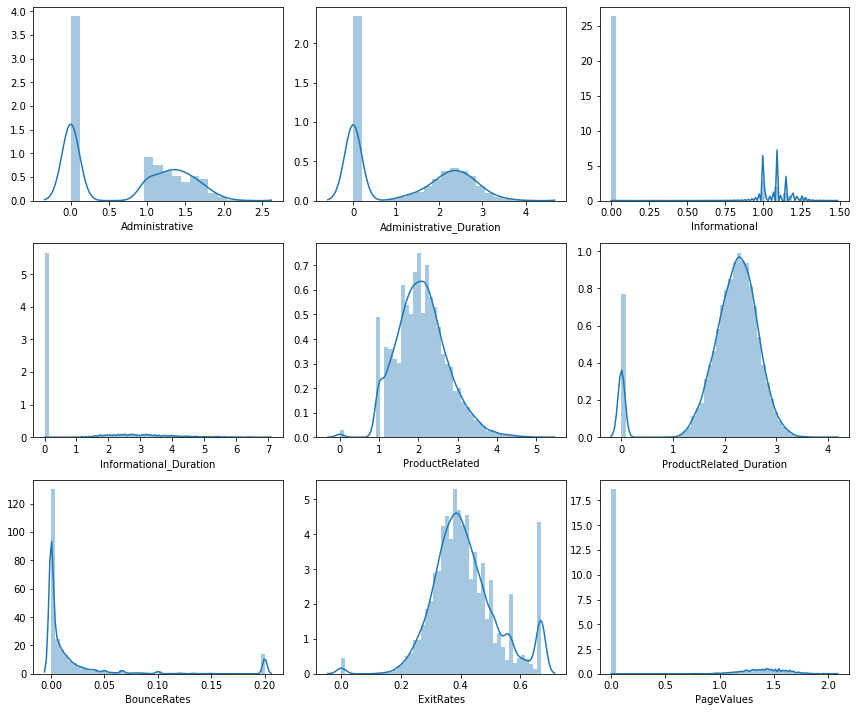

In [822]:
num_cols = data_num.columns
fig, ax = plt.subplots(3,3,figsize=(12,10))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.distplot(data_num[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

In [823]:
newdata = pd.concat([data_cat_dum, data_cat_le, data_num], axis=1)

In [824]:
newdata

,Region,Browser,OperatingSystems,Weekend,Revenue,TrafficType,Month_Dec,Month_Feb,Month_Jul,Month_June,...,SpecialDay,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,1,1,1,0,0,1,0,1,0,0,...,0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.200000,0.668740,0.000000
1,1,2,2,0,0,2,0,1,0,0,...,0,0.000000,0.000000,0.0,0.0,1.189207,1.681793,0.000000,0.562341,0.000000
2,9,1,4,0,0,3,0,1,0,0,...,0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.200000,0.668740,0.000000
3,2,2,3,0,0,4,0,1,0,0,...,0,0.000000,0.000000,0.0,0.0,1.189207,1.130436,0.050000,0.611691,0.000000
4,1,3,3,1,0,4,0,1,0,0,...,0,0.000000,0.000000,0.0,0.0,1.778279,2.237184,0.020000,0.472871,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1,6,4,1,0,1,1,0,0,0,...,0,1.316074,2.568144,0.0,0.0,2.698168,2.549283,0.007143,0.412776,1.367667
12326,1,2,3,1,0,8,0,0,0,0,...,0,0.000000,0.000000,0.0,0.0,1.495349,2.155356,0.000000,0.382177,0.000000
12327,1,2,3,1,0,13,0,0,0,0,...,0,0.000000,0.000000,0.0,0.0,1.565085,1.919446,0.083333,0.542579,0.000000
12328,3,2,2,0,0,11,0,0,0,0,...,0,1.414214,2.268020,0.0,0.0,1.967990,2.076751,0.000000,0.380914,0.000000


In [825]:
data1 = newdata

In [826]:
X = data1.drop(columns=['Revenue'])
y = data1['Revenue']

In [827]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [828]:
def model_fit(algo, X_train, y_train, X_test, y_test):
    #for train Data
    
    algo.fit(X_train, y_train)
    y_train_pred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,1]
    print('AUC score of Train:', roc_auc_score(y_train, y_train_prob))
    fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
    print(confusion_matrix(y_train, y_train_pred))
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)
    
    #For test Data
    
    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('AUC score of Test:', roc_auc_score(y_test, y_test_prob))
    fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
    print(confusion_matrix(y_test, y_test_pred))
    
    
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)
    
    print(cohen_kappa_score(y_test, y_test_pred))

In [829]:
def evaluate_model(model, X, y):
    
    
    ypred = model.predict(X)
    cm = confusion_matrix(y, ypred)
    tp = cm[0,0]
    tn = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    f1 = 2*precision*recall / (precision+recall)
    print('Accuracy =',accuracy)
    print('Precision =', precision)
    print('Recall =', recall)
    print('F1 Score =', f1)


In [830]:
X_train.shape

(8631, 26)

In [831]:
X_test.shape

(3699, 26)

In [832]:
y_train.shape

(8631,)

In [833]:
y_test.shape

(3699,)

### Logistic Regression

AUC score of Train: 0.9177360653835569
[[6941  332]
 [ 538  820]]


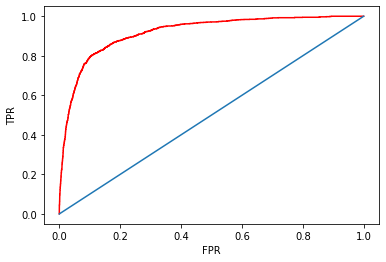

778
AUC score of Test: 0.914699616039724
[[2990  159]
 [ 208  342]]


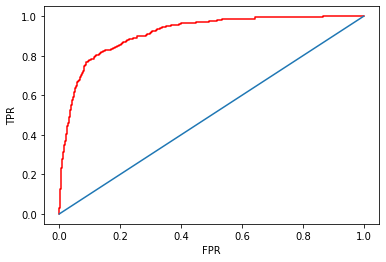

330
0.5931326049759796
Accuracy = 0.8996755879967558
Precision = 0.9528881212819037
Recall = 0.9301301863819424
F1 Score = 0.9413716289871557


In [834]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
model_fit(lr_model, X_train, y_train, X_test, y_test )
evaluate_model(lr_model, X,y)

### KNN

AUC score of Train: 0.9523640102082327
[[7055  218]
 [ 577  781]]


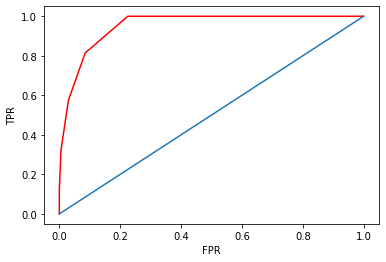

5
AUC score of Test: 0.8475833597967609
[[3011  138]
 [ 295  255]]


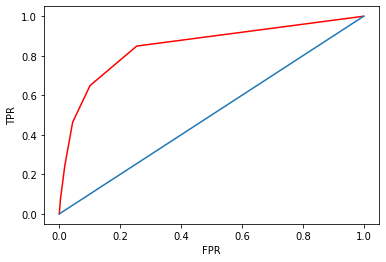

5
0.47586978055583107
Accuracy = 0.9004055150040552
Precision = 0.9658414891575513
Recall = 0.9202779301517645
F1 Score = 0.9425093632958801


In [835]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_fit(knn, X_train, y_train, X_test, y_test )
evaluate_model(knn, X,y)

### Naive Bayes

AUC score of Train: 0.8582971354700855
[[4921 2352]
 [ 165 1193]]


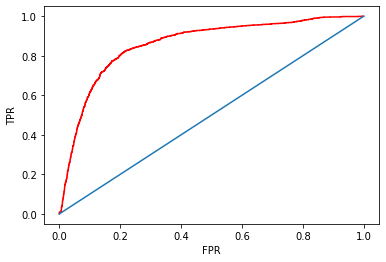

1152
AUC score of Test: 0.8602846502497186
[[2114 1035]
 [  61  489]]


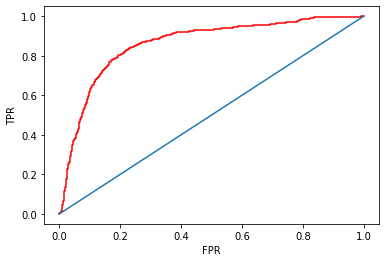

499
0.32378923181158126
Accuracy = 0.7069748580697486
Precision = 0.675014392630973
Recall = 0.9688748106321443
F1 Score = 0.7956794661539333


In [836]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_fit(nb, X_train, y_train, X_test, y_test )
evaluate_model(nb, X,y)

### Decision Tree

AUC score of Train: 1.0
[[7273    0]
 [   0 1358]]


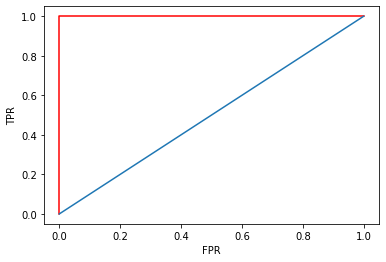

1
AUC score of Test: 0.7312139495943879
[[2899  250]
 [ 252  298]]


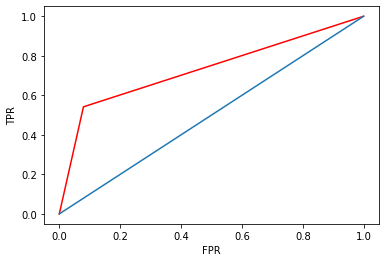

1
0.4631228709498535
Accuracy = 0.9592862935928629
Precision = 0.9760122817117636
Recall = 0.9758250191864927
F1 Score = 0.9759186414659886


In [837]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_fit(dt, X_train, y_train, X_test, y_test )
evaluate_model(dt, X,y)

### Ensemble Techniques

AUC score of Train: 0.9281258359291645
[[6933  340]
 [ 570  788]]


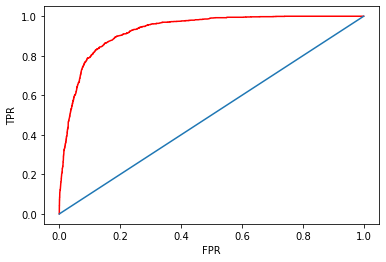

908
AUC score of Test: 0.911032362366119
[[2972  177]
 [ 239  311]]


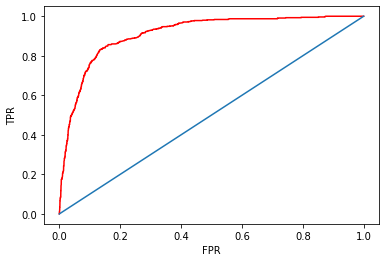

409
0.5340917692525227
Accuracy = 0.8924574209245743
Precision = 0.9503933985799271
Recall = 0.9244913197685272
F1 Score = 0.9372634367903103


In [838]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
model_fit(ada, X_train, y_train, X_test, y_test )
evaluate_model(ada, X,y)

AUC score of Train: 0.9996215348110012
[[7265    8]
 [  78 1280]]


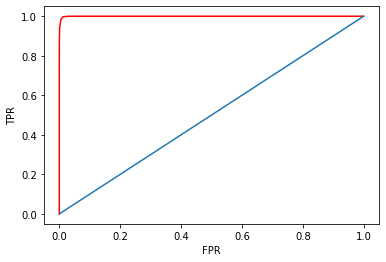

7
AUC score of Test: 0.896078697421981
[[3025  124]
 [ 264  286]]


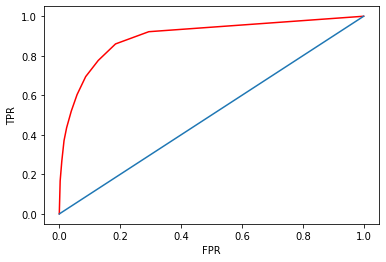

9
0.5370343608469568
Accuracy = 0.9615571776155718
Precision = 0.9873344847438111
Recall = 0.9678329571106095
F1 Score = 0.9774864633798803


In [839]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()

model_fit(bc, X_train, y_train, X_test, y_test )
evaluate_model(bc, X,y)